<h1 align="center"> Лабораторная работа №2 </h1>

---

<h1 align="center"> Университет ИТМО </h1>
<h2 align="center"> Факультет систем управления и робототехники </h2>

---

### Выполнили:
- **Соколов Никита**  
- **Минеев Кирилл**
- **Соловьев Дмитрий**
- **Семёнов Евгений**

---

### Проверил:
- **Догадин Егор Витальевич**

---

### 23 сентября 2024 г.

---

# Подготовка.

### Установка необходимых библиотек:

In [147]:
!pip install numpy matplotlib sympy


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import random
import math;

### Придумаем четыре целых числа a, b, c, d таким образом, чтобы все они были различными и ни одно из них не равнялось 0 или ±1.

In [149]:
a = random.randint(1, 6)
b = random.randint(a + 1, 11)
c = random.randint(b + 1, 16)
d = random.randint(c + 1, 21)

print(a, b, c, d, sep = "\t")

6	7	12	15


### Исходные значения x и y:

In [150]:
x_min, x_max = -5, 5
y_min, y_max = -4, 4

x_old = np.linspace(x_min, x_max, 11)
y_old = np.linspace(y_min, y_max, 9)
xy_old = np.column_stack([[x, y] for x in x_old for y in y_old])

### Функция для визуализации линейных отображений: 

In [151]:
colors = list(map(lambda x, y: (min(1, 1-y/4), min(1, 1+y/4), 1/5 + x/25), xy_old[0], xy_old[1]))

def plot_grid(xy_grid):
    plt.figure(figsize=(6, 6), facecolor="w")
    plt.scatter(xy_grid[0], xy_grid[1], s = 50, c = colors)
    plt.axis('equal')
    plt.grid(True)
    

### Функция для построения прямых:

In [152]:
def plot_line(k):
    x = np.linspace(x_min, x_max, 11)
    y = k * x
    plt.plot(x, y, color="red")
    plt.ylim(y_min, y_max)
    plt.show()

### Исходная сетка значений:

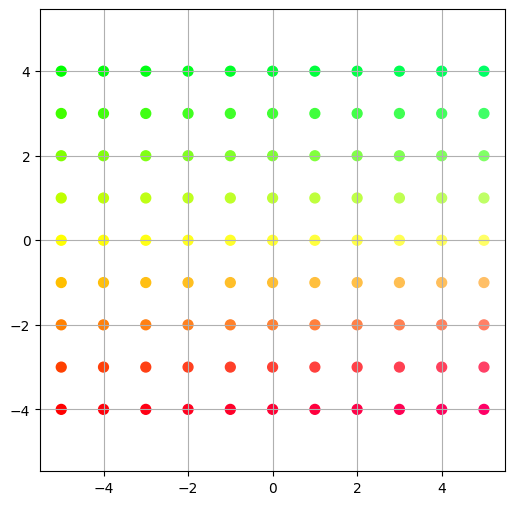

In [153]:
plot_grid(xy_old)

# Задание 1.

<h3 style="font-weight: bold;">1. Отражение (симметрия) плоскости относительно прямой y = ax: </h3>

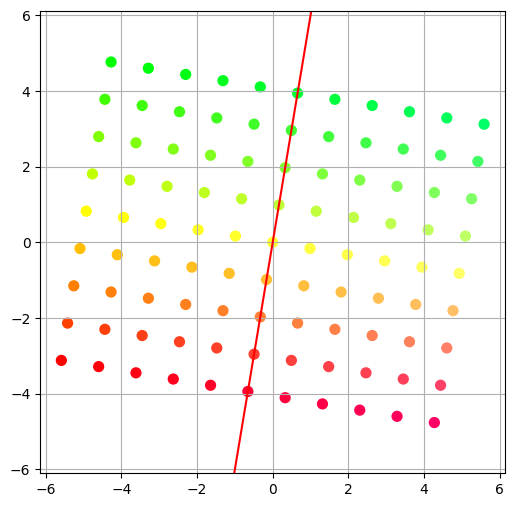

⎡0.986393923832144   0.164398987305357⎤
⎢                                     ⎥
⎣-0.164398987305357  0.986393923832144⎦


In [154]:
theta_angle = -(math.pi / 2 - np.arctan(a))

first_matrix = Matrix([
    [np.cos(theta_angle), -np.sin(theta_angle)],
    [np.sin(theta_angle), np.cos(theta_angle)]
])

xy_new = np.dot(first_matrix, xy_old)
plot_grid(xy_new)

plot_line(a)
pprint(first_matrix)

<h3 style="font-weight: bold;">2. Отображение всей плоскости в прямую y = bx: </h3>

⎡1  1⎤
⎢    ⎥
⎣7  7⎦


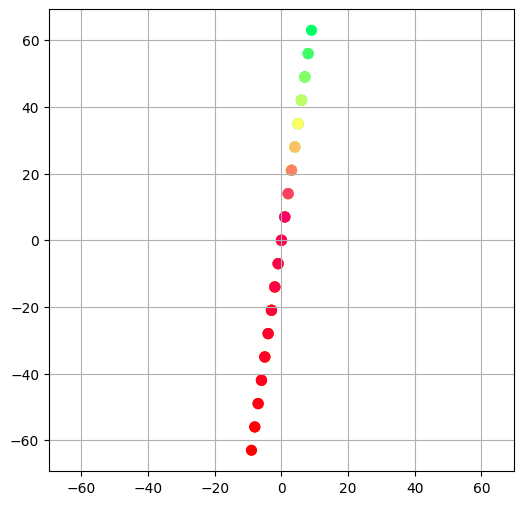

In [155]:
second_matrix = Matrix([
    [1, 1], 
    [b, b]
])

xy_new = np.dot(second_matrix, xy_old)

plot_grid(xy_new)
pprint(second_matrix)

<h3 style="font-weight: bold;">3. Поворот плоскости на 10c градусов против часовой стрелки: </h3>

⎡      -0.5         -0.866025403784439⎤
⎢                                     ⎥
⎣0.866025403784439         -0.5       ⎦


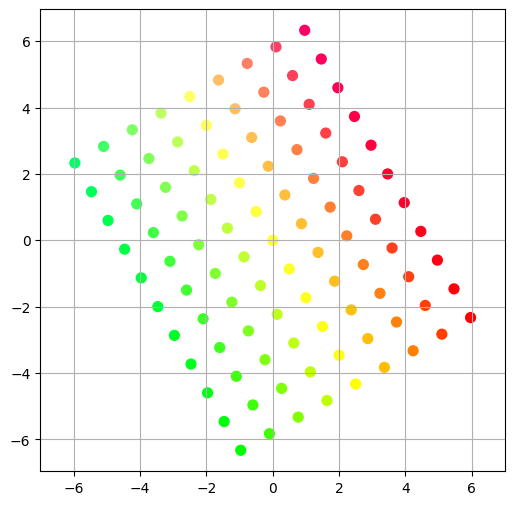

In [156]:
alpha_angle = np.radians(10 * c)

third_matrix = Matrix([
    [np.cos(alpha_angle), -np.sin(alpha_angle)],
    [np.sin(alpha_angle), np.cos(alpha_angle)]
])

xy_new = np.dot(third_matrix, xy_old)

plot_grid(xy_new)
pprint(third_matrix)

<h3 style="font-weight: bold;">4. Центральная симметрия плоскости относительно начала координат: </h3>

⎡-1.0   0  ⎤
⎢          ⎥
⎣ 0    -1.0⎦


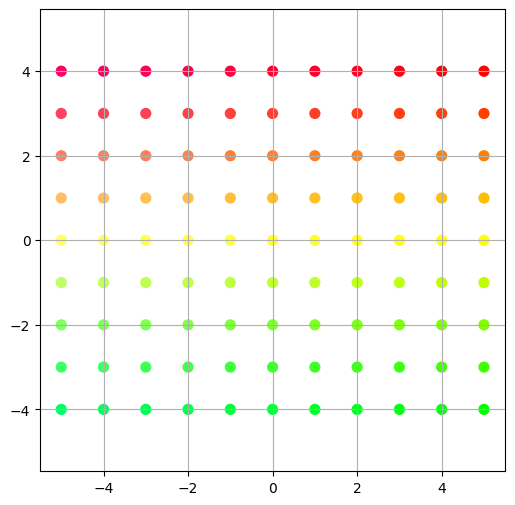

In [157]:
beta_angle = math.pi

fourth_matrix = Matrix([
    [np.cos(beta_angle), round(-np.sin(beta_angle))],
    [round(np.sin(beta_angle)), np.cos(beta_angle)]
])

xy_new = np.dot(fourth_matrix, xy_old)

plot_grid(xy_new)
pprint(fourth_matrix)

<h3 style="font-weight: bold;">5. Отображение, которое можно описать так: сначала отражение относительно прямой y = ax, потом поворот на 10d градусов по часовой стрелке: </h3>

⎡-0.772042702524571  -0.635570661278947⎤
⎢                                      ⎥
⎣0.635570661278947   -0.772042702524571⎦


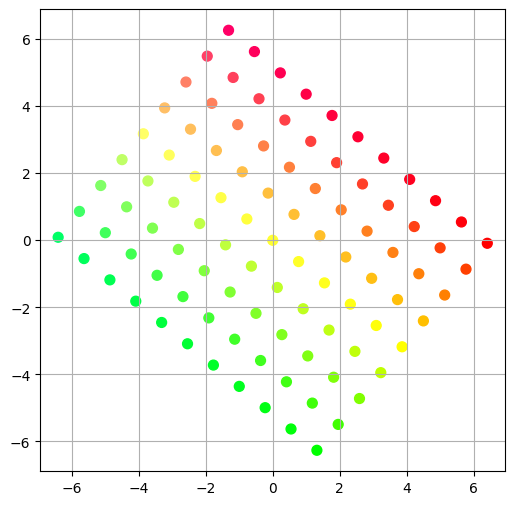

In [158]:
gamma_angle = np.radians(10 * d)

fifth_matrix = Matrix([
    [np.cos(gamma_angle), -np.sin(gamma_angle)],
    [np.sin(gamma_angle), np.cos(gamma_angle)]
]) * first_matrix

xy_new = np.dot(fifth_matrix, xy_old)

plot_grid(xy_new)
pprint(fifth_matrix)

<h3 style="font-weight: bold;">6. Отображение, которое переводит прямую y = 0 в y = ax и прямую x = 0 в y = bx: </h3>

⎡1  0.857142857142857⎤
⎢                    ⎥
⎣6          6        ⎦


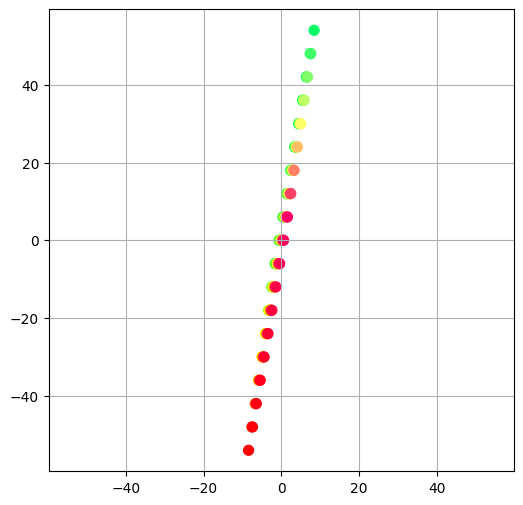

In [159]:
sixth_matrix = Matrix([
    [1, a / b],
    [a, a]
])

xy_new = np.dot(sixth_matrix, xy_old)

plot_grid(xy_new)
pprint(sixth_matrix)

<h3 style="font-weight: bold;">7. Отображение, которое переводит прямую y = ax в y = 0 и прямую y = bx в x = 0: </h3>

⎡7.0   -0.999999999999999⎤
⎢                        ⎥
⎣-7.0   1.16666666666667 ⎦


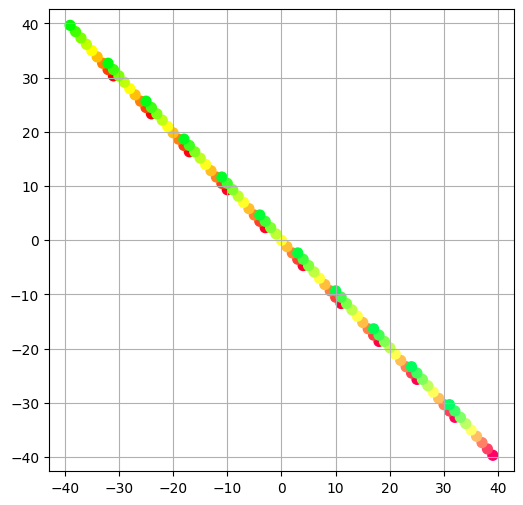

In [160]:
seventh_matrix = sixth_matrix.inv()

xy_new = np.dot(seventh_matrix, xy_old)

plot_grid(xy_new)
pprint(seventh_matrix)

<h3 style="font-weight: bold;">8. Отображение, которое меняет местами прямые y = ax и y = bx: </h3>

⎡-161⋅√2   73⋅√2 ⎤
⎢────────  ───── ⎥
⎢   5        5   ⎥
⎢                ⎥
⎢ 73⋅√2    161⋅√2⎥
⎢ ─────    ──────⎥
⎣   5        5   ⎦


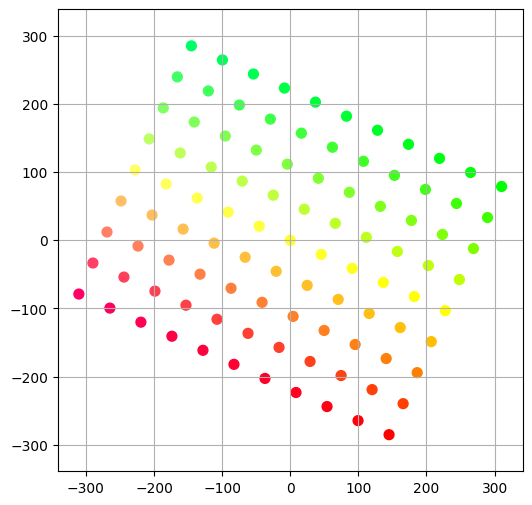

In [161]:
alpha_angle = acos(7 / sqrt(50))
eight_matrix = Matrix([[1 - b ** 2, 2 * b],
                       [2 * b, b ** 2 - 1]]) * Matrix([
    [cos(alpha_angle), -sin(alpha_angle)], 
    [sin(alpha_angle), cos(alpha_angle)]
])

xy_new = np.dot(eight_matrix, xy_old)

plot_grid(xy_new)
pprint(eight_matrix)

<h3 style="font-weight: bold;">9. Отображение, которое переводит круг единичной площади с центром в начале координат в круг площади c: </h3>

⎡12  0 ⎤
⎢      ⎥
⎣0   12⎦


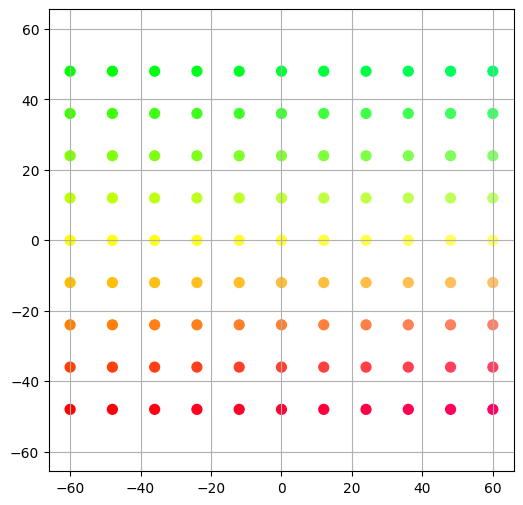

In [162]:
ninth_matrix = Matrix([
    [c, 0],
    [0, c]
])

xy_new = np.dot(ninth_matrix, xy_old)

plot_grid(xy_new)
pprint(ninth_matrix)

<h3 style="font-weight: bold;">10. Отображение, которое переводит круг единичной площади с центром в начале
координат в некруг площади d:</h3>

⎡4.77464829275686  0⎤
⎢                   ⎥
⎣       0          1⎦


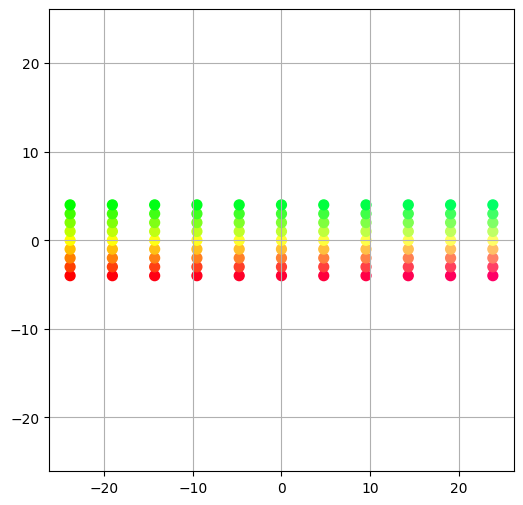

In [163]:
tenth_matrix = Matrix([
    [d / math.pi, 0],
    [0, 1]
])

xy_new = np.dot(tenth_matrix, xy_old)

plot_grid(xy_new)
pprint(tenth_matrix)

<h3 style="font-weight: bold;">11. Отображение, у которого собственные вектора перпендикулярны, и ни один из
них не лежит на прямой y = 0 или y = x:</h3>

⎡4.77464829275686  0⎤
⎢                   ⎥
⎣       0          1⎦


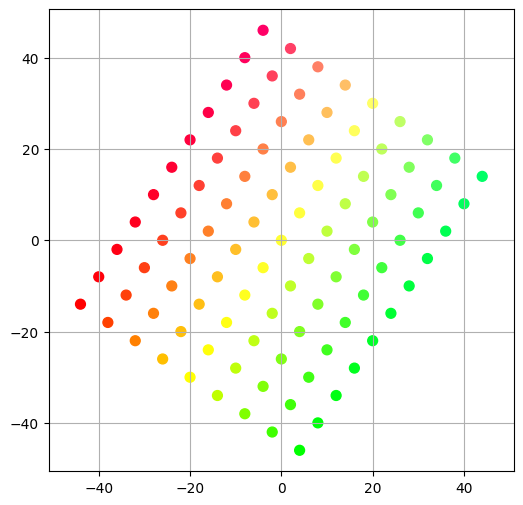

In [164]:
eleventh_matrix = Matrix([
    [4, 6],
    [6, -4]
])

xy_new = np.dot(eleventh_matrix, xy_old)

plot_grid(xy_new)
pprint(tenth_matrix)

 <h3 style="font-weight: bold;">12. Отображение, у которого нет двух неколлинеарных собственных векторов:</h3>

⎡2  1⎤
⎢    ⎥
⎣0  2⎦


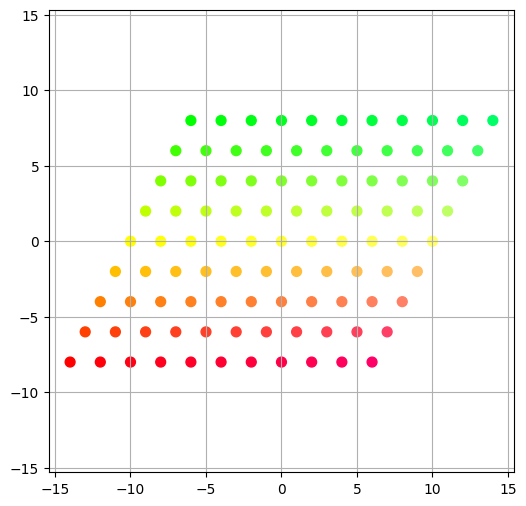

In [165]:
twelfth_matrix = Matrix([
    [2, 1],
    [0, 2]
])
xy_new = np.dot(twelfth_matrix, xy_old)

plot_grid(xy_new)
pprint(twelfth_matrix)

<h3 style="font-weight: bold;">13. Отображение, у которого нет ни одного вещественного собственного вектора (но при этом само отображение задаётся вещественной матрицей):</h3>

⎡2   3⎤
⎢     ⎥
⎣-3  2⎦


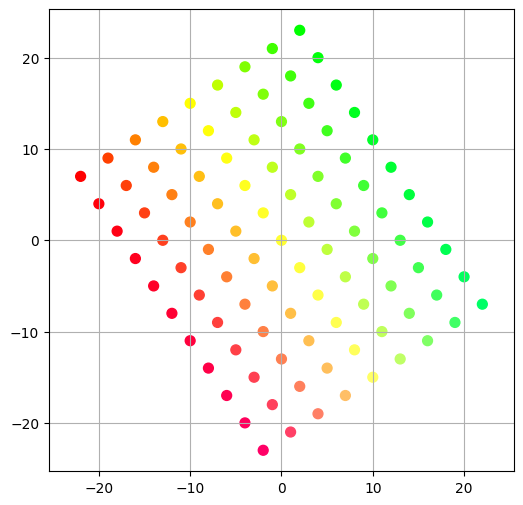

In [166]:
thirteenth_matrix = Matrix([
    [2, 3], 
    [-3, 2]
])

xy_new = np.dot(thirteenth_matrix, xy_old)

plot_grid(xy_new)
pprint(thirteenth_matrix)

<h3 style="font-weight: bold;">14. Отображение, для которого любой ненулевой вектор является собственным:</h3>

⎡1  0⎤
⎢    ⎥
⎣0  1⎦


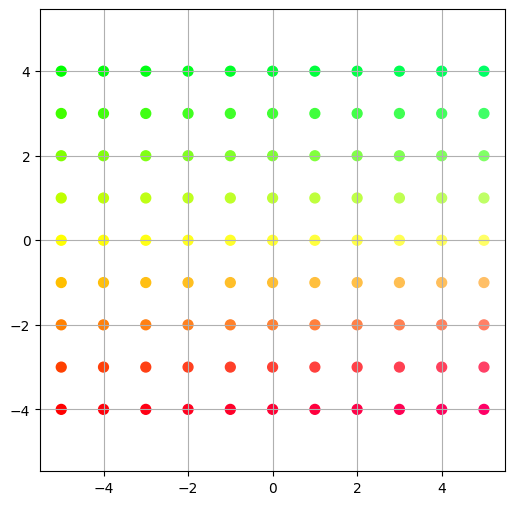

In [167]:
fourteenth_matrix = Matrix([
    [1, 0], 
    [0, 1]
])

xy_new = np.dot(fourteenth_matrix, xy_old)

plot_grid(xy_new)
pprint(fourteenth_matrix)

<h3 style="font-weight: bold;">15. Пару отображений, последовательное применение которых даёт различные результаты в зависимости от порядка: AB ̸= BA. Cделайте визуализацию всех рассматриваемых отображений, а именно: A, B, AB и BA:</h3>

<h3 style="font-weight: bold;">15.1 Первое отображение:</h3>

⎡8   16⎤
⎢      ⎥
⎣12  -2⎦


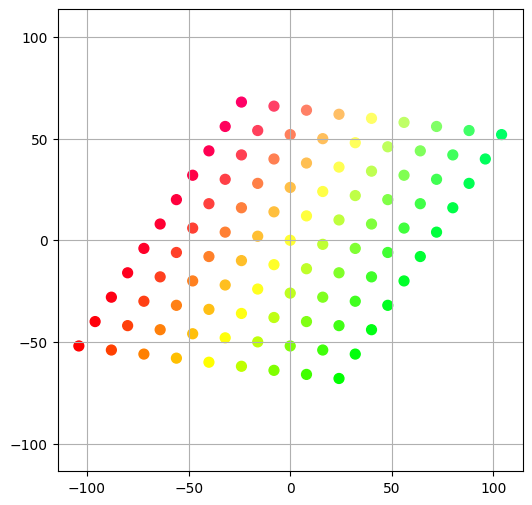

In [168]:
fifteenth_matrix_1 = eleventh_matrix * twelfth_matrix

xy_new = np.dot(fifteenth_matrix_1 , xy_old)

plot_grid(xy_new)
pprint(fifteenth_matrix_1)

<h3 style="font-weight: bold;">15.2 Второе отображение:</h3>

⎡14  8 ⎤
⎢      ⎥
⎣12  -8⎦


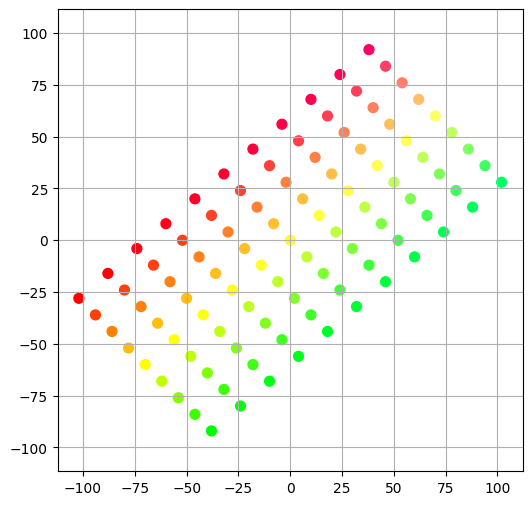

In [169]:
fifteenth_matrix_2 = twelfth_matrix * eleventh_matrix

xy_new = np.dot(fifteenth_matrix_2, xy_old)

plot_grid(xy_new)
pprint(fifteenth_matrix_2)

<h3 style="font-weight: bold;">16. Пару отображений, последовательное применение которых даёт одинаковый результат независимо от порядка: AB = BA. Постарайтесь, чтобы матрицы A и B были максимально непохожими друг на друга. Сделайте визуализацию, аналогичную передыдущему пункту:</h3>

<h3 style="font-weight: bold;">16.1 Первое отображение:</h3>

⎡      -6.0        -10.3923048454133⎤
⎢                                   ⎥
⎣10.3923048454133        -6.0       ⎦


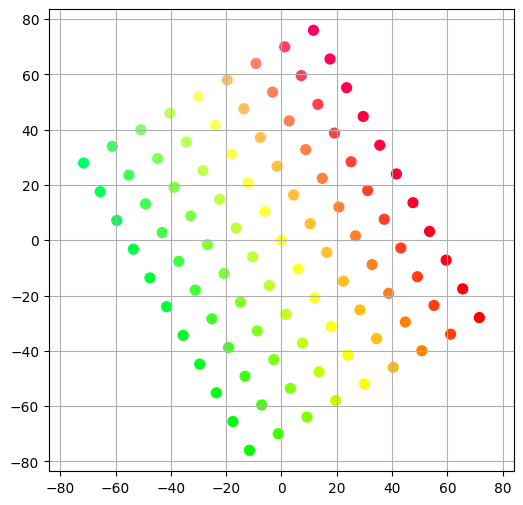

In [170]:
sixteenth_matrix_1 = third_matrix * ninth_matrix

xy_new = np.dot(sixteenth_matrix_1, xy_old)

plot_grid(xy_new)
pprint(sixteenth_matrix_1)

<h3 style="font-weight: bold;">16.2 Второе отображение:</h3>

⎡      -6.0        -10.3923048454133⎤
⎢                                   ⎥
⎣10.3923048454133        -6.0       ⎦


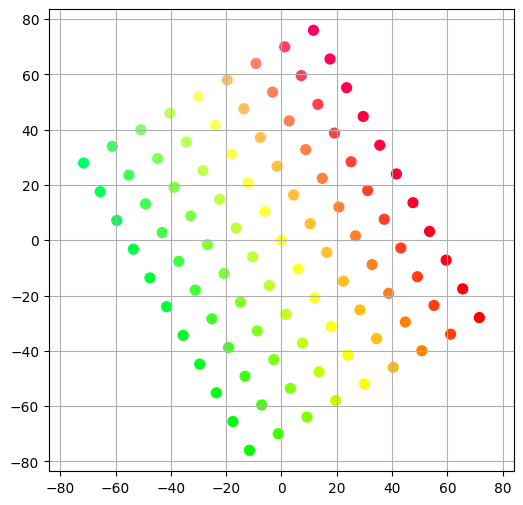

In [171]:
sixteenth_matrix_2 = ninth_matrix * third_matrix

xy_new = np.dot(sixteenth_matrix_2, xy_old)

plot_grid(xy_new)
pprint(sixteenth_matrix_2)

# Задание 2.

<h3 style="font-weight: bold;">1. Найдите образ и ядро придуманных вами отображений из пунктов 1, 2, 13, 14:</h3>

In [172]:
matrix_list = [
    first_matrix, second_matrix, thirteenth_matrix, fourteenth_matrix
]

for matrix in matrix_list:
    print("Linear operator:")
    pprint(matrix)
    print("Columnspace:")
    pprint(matrix.columnspace())
    print("Nullspace:")
    pprint(matrix.nullspace())
    print()

Linear operator:
⎡0.986393923832144   0.164398987305357⎤
⎢                                     ⎥
⎣-0.164398987305357  0.986393923832144⎦
Columnspace:
⎡⎡0.986393923832144 ⎤  ⎡0.164398987305357⎤⎤
⎢⎢                  ⎥, ⎢                 ⎥⎥
⎣⎣-0.164398987305357⎦  ⎣0.986393923832144⎦⎦
Nullspace:
[]

Linear operator:
⎡1  1⎤
⎢    ⎥
⎣7  7⎦
Columnspace:
⎡⎡1⎤⎤
⎢⎢ ⎥⎥
⎣⎣7⎦⎦
Nullspace:
⎡⎡-1⎤⎤
⎢⎢  ⎥⎥
⎣⎣1 ⎦⎦

Linear operator:
⎡2   3⎤
⎢     ⎥
⎣-3  2⎦
Columnspace:
⎡⎡2 ⎤  ⎡3⎤⎤
⎢⎢  ⎥, ⎢ ⎥⎥
⎣⎣-3⎦  ⎣2⎦⎦
Nullspace:
[]

Linear operator:
⎡1  0⎤
⎢    ⎥
⎣0  1⎦
Columnspace:
⎡⎡1⎤  ⎡0⎤⎤
⎢⎢ ⎥, ⎢ ⎥⎥
⎣⎣0⎦  ⎣1⎦⎦
Nullspace:
[]


<h3 style="font-weight: bold;">2. Найдите собственные числа и собственные вектора придуманных вами отображений из пунктов 1, 2, 3, 4, 8, 11, 12, 13, 14, 15, 16:</h3>

In [173]:
matrix_list = [
    first_matrix, second_matrix, third_matrix, fourth_matrix, eight_matrix,
    eleventh_matrix, twelfth_matrix, thirteenth_matrix, 
    fourth_matrix, fifteenth_matrix_1, fifteenth_matrix_2,
    sixteenth_matrix_1
]

for matrix in matrix_list:
    print("Linear operator:")
    pprint(matrix)
    print("Eigenvalues:")
    pprint(matrix.eigenvals())
    print("Eigenvectors:")
    pprint(matrix.eigenvects())
    print()

Linear operator:
⎡0.986393923832144   0.164398987305357⎤
⎢                                     ⎥
⎣-0.164398987305357  0.986393923832144⎦
Eigenvalues:
{0.986393923832144 - 0.164398987305357⋅ⅈ: 1, 0.986393923832144 + 0.16439898730 ↪

↪ 5357⋅ⅈ: 1}
Eigenvectors:
⎡⎛                                            ⎡⎡-0.707106781186548⋅ⅈ⎤⎤⎞  ⎛     ↪
⎢⎜0.986393923832144 - 0.164398987305357⋅ⅈ, 1, ⎢⎢                    ⎥⎥⎟, ⎜0.98 ↪
⎣⎝                                            ⎣⎣ -0.707106781186548 ⎦⎦⎠  ⎝     ↪

↪                                         ⎡⎡ 0.707106781186548 ⎤⎤⎞⎤
↪ 6393923832144 + 0.164398987305357⋅ⅈ, 1, ⎢⎢                   ⎥⎥⎟⎥
↪                                         ⎣⎣0.707106781186548⋅ⅈ⎦⎦⎠⎦

Linear operator:
⎡1  1⎤
⎢    ⎥
⎣7  7⎦
Eigenvalues:
{0: 1, 8: 1}
Eigenvectors:
⎡⎛      ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1/7⎤⎤⎞⎤
⎢⎜0, 1, ⎢⎢  ⎥⎥⎟, ⎜8, 1, ⎢⎢   ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣ 1 ⎦⎦⎠⎦

Linear operator:
⎡      -0.5         -0.866025403784439⎤
⎢                                     ⎥
⎣0.86602540378

<h3 style="font-weight: bold;">3. Найдите определитель матриц из пунктов 1, 2, 3, 4, 5, 9, 10:</h3>

In [174]:
matrix_list = [
    first_matrix, second_matrix, third_matrix,
    fourth_matrix, fifth_matrix,
    ninth_matrix, tenth_matrix
]

for matrix in matrix_list:
    print("Linear operator:")
    pprint(matrix)
    print(f"Determinant: {N(matrix.det())}")

Linear operator:
⎡0.986393923832144   0.164398987305357⎤
⎢                                     ⎥
⎣-0.164398987305357  0.986393923832144⎦
Determinant: 1.00000000000000
Linear operator:
⎡1  1⎤
⎢    ⎥
⎣7  7⎦
Determinant: 0
Linear operator:
⎡      -0.5         -0.866025403784439⎤
⎢                                     ⎥
⎣0.866025403784439         -0.5       ⎦
Determinant: 1.00000000000000
Linear operator:
⎡-1.0   0  ⎤
⎢          ⎥
⎣ 0    -1.0⎦
Determinant: 1.00000000000000
Linear operator:
⎡-0.772042702524571  -0.635570661278947⎤
⎢                                      ⎥
⎣0.635570661278947   -0.772042702524571⎦
Determinant: 1.00000000000000
Linear operator:
⎡12  0 ⎤
⎢      ⎥
⎣0   12⎦
Determinant: 144.000000000000
Linear operator:
⎡4.77464829275686  0⎤
⎢                   ⎥
⎣       0          1⎦
Determinant: 4.77464829275686


<h3 style="font-weight: bold;">4. В каких пунктах матрица обязательно получается симметричной?</h3>

In [179]:
matrix_list = [
    first_matrix,
    second_matrix,
    third_matrix,
    fourth_matrix,
    fifth_matrix,
    sixth_matrix,
    seventh_matrix,
    eight_matrix,
    ninth_matrix,
    tenth_matrix,
    eleventh_matrix,
    twelfth_matrix,
    thirteenth_matrix,
    fourth_matrix,
    fifteenth_matrix_1,
    fifteenth_matrix_2,
    sixth_matrix
]

for i in range(len(matrix_list)):
    print(f"Linear operator {i + 1}:")
    pprint(matrix_list[i])
    print()
print("Answer: 4 8 9 10 11 14 ")

Linear operator 1:
⎡0.986393923832144   0.164398987305357⎤
⎢                                     ⎥
⎣-0.164398987305357  0.986393923832144⎦

Linear operator 2:
⎡1  1⎤
⎢    ⎥
⎣7  7⎦

Linear operator 3:
⎡      -0.5         -0.866025403784439⎤
⎢                                     ⎥
⎣0.866025403784439         -0.5       ⎦

Linear operator 4:
⎡-1.0   0  ⎤
⎢          ⎥
⎣ 0    -1.0⎦

Linear operator 5:
⎡-0.772042702524571  -0.635570661278947⎤
⎢                                      ⎥
⎣0.635570661278947   -0.772042702524571⎦

Linear operator 6:
⎡1  0.857142857142857⎤
⎢                    ⎥
⎣6          6        ⎦

Linear operator 7:
⎡7.0   -0.999999999999999⎤
⎢                        ⎥
⎣-7.0   1.16666666666667 ⎦

Linear operator 8:
⎡-161⋅√2   73⋅√2 ⎤
⎢────────  ───── ⎥
⎢   5        5   ⎥
⎢                ⎥
⎢ 73⋅√2    161⋅√2⎥
⎢ ─────    ──────⎥
⎣   5        5   ⎦

Linear operator 9:
⎡12  0 ⎤
⎢      ⎥
⎣0   12⎦

Linear operator 10:
⎡4.77464829275686  0⎤
⎢                   ⎥
⎣       0          1⎦

